In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

In [4]:
filename = "regression.csv"

In [5]:
df = pd.read_csv(filename, sep=";", quoting=2, encoding="utf-8")
df.head()

,scientificName_y,redlistCategory,region_count,enumRedListCategory
0,Piper amalago,Least Concern,35.0,0.0
1,Piper aduncum,Least Concern,32.0,0.0
2,Piper hispidum,Least Concern,27.0,0.0
3,Piper tuberculatum,Least Concern,26.0,0.0
4,Piper dilatatum,Least Concern,25.0,0.0


In [6]:
X = df[["enumRedListCategory"]]
y = df[["region_count"]]

In [32]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X, y)

5

In [33]:
mse_scores = []
r2_scores = []
rocs = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f" Fold {fold}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"  X_train shape: {X_train.shape}")
    print(f"  X_test  shape: {X_test.shape}")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    reg = LinearRegression().fit(X_train, y_train)

    scaler = StandardScaler()
    X_test = scaler.fit_transform(X_test)
    y_pred = reg.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold+1}: MSE = {mse}, R*R = {r2}")

 Fold 0:
  X_train shape: (80, 1)
  X_test  shape: (21, 1)
Fold 1: MSE = 58.35452822503945, R*R = 0.18448640679292705
 Fold 1:
  X_train shape: (81, 1)
  X_test  shape: (20, 1)
Fold 2: MSE = 50.546167319820505, R*R = 0.20786448331263907
 Fold 2:
  X_train shape: (81, 1)
  X_test  shape: (20, 1)
Fold 3: MSE = 35.687719886780734, R*R = 0.28424147840391634
 Fold 3:
  X_train shape: (81, 1)
  X_test  shape: (20, 1)
Fold 4: MSE = 30.49864244395085, R*R = 0.15889016977521098
 Fold 4:
  X_train shape: (81, 1)
  X_test  shape: (20, 1)
Fold 5: MSE = 26.053177215201124, R*R = 0.19089511754033783


/home/xandao/miniconda3/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [34]:
print(f"Média MSE: {np.mean(mse_scores)} (+/- {np.std(mse_scores)})")
print(f"Média R²: {np.mean(r2_scores)} (+/- {np.std(r2_scores)})")

Média MSE: 40.228047018158534 (+/- 12.257534379003868)
Média R²: 0.20527553116500624 (+/- 0.0425039039053998)


In [35]:
df[["region_count", "enumRedListCategory"]].corr()

,region_count,enumRedListCategory
region_count,1.00000,-0.46111
enumRedListCategory,-0.46111,1.00000


In [16]:
X = sm.add_constant(X)

modelo = sm.OLS(y, X)

resultado = modelo.fit()

resultado.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           region_count   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     26.73
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           1.22e-06
Time:                        09:42:16   Log-Likelihood:                -330.04
No. Observations:                 101   AIC:                             664.1
Df Residuals:                      99   BIC:                             669.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.7201      0.861      8.966      0.000       6.012       9.429
enumRedListCategory    -2.5789      0.499     -5.170      0.000      -3.569      -1.589
==============================================================================
Omnibus:                       64.171   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.503
Skew:                           2.303   Prob(JB):                     3.97e-50
Kurtosis:                       8.731   Cond. No.                         2.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
coeficientes = resultado.summary2().tables[1]
coeficientes.to_csv("coeficientes.csv")
coeficientes

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,7.720141,0.861055,8.965907,1.965225e-14,6.011621,9.428662
enumRedListCategory,-2.578925,0.498779,-5.170473,1.217840e-06,-3.568612,-1.589239


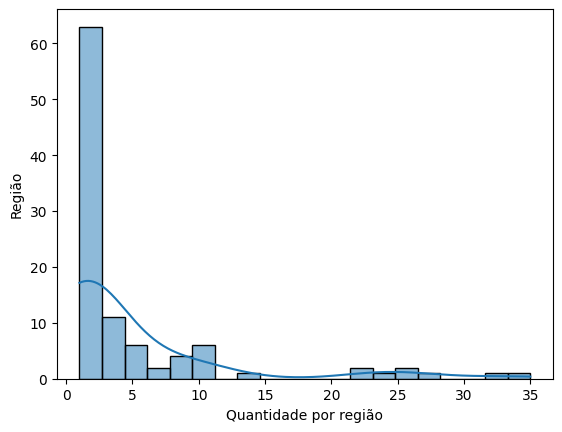

In [50]:
ax = sns.histplot(data = df, x = "region_count", kde = True)
ax.set_xlabel("Quantidade por região")
ax.set_ylabel("Região")
plt.savefig("output1.png")

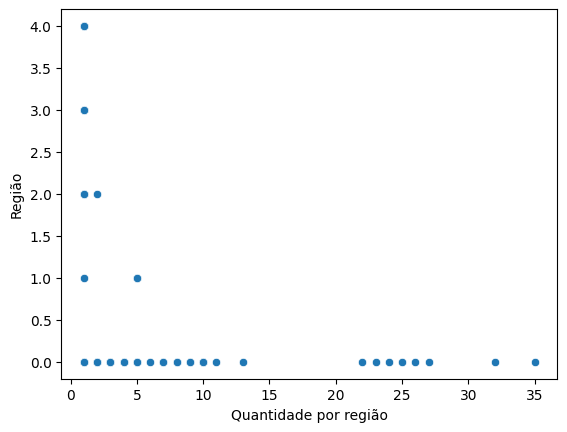

In [51]:
ax = sns.scatterplot(data = df, x = "region_count", y = "enumRedListCategory")
ax.set_xlabel("Quantidade por região")
ax.set_ylabel("Região")
plt.savefig("output2.png")

/home/xandao/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


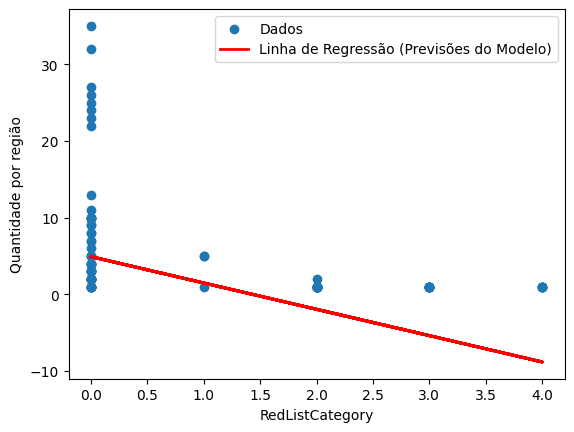

In [52]:

# Plot
plt.scatter(X, y, label="Dados")
plt.plot(X, reg.predict(X), linewidth=2, color="red", label = "Linha de Regressão (Previsões do Modelo)")
plt.xlabel("RedListCategory")
plt.ylabel("Quantidade por região")
plt.savefig("output3.png")
plt.legend()
plt.show()